In [372]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [373]:
n_task_per_file = 20
n_files = 10
base_dir = "noise_sd=1/vary_r_noisesd_1.0_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [374]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [375]:
coverage_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
0,1.0,0.75,1.00,0.75,1.00,1.0,0.75,1.00
1,1.0,0.75,0.50,1.00,0.75,1.0,1.00,1.00
2,0.5,1.00,0.75,0.75,1.00,1.0,1.00,1.00
3,1.0,0.75,0.50,1.00,1.00,0.5,1.00,1.00
4,1.0,1.00,1.00,1.00,0.50,1.0,0.75,0.75
...,...,...,...,...,...,...,...,...
15,1.0,1.00,1.00,0.75,1.00,1.0,0.50,0.50
16,1.0,0.75,0.75,1.00,0.75,1.0,1.00,1.00
17,1.0,0.75,1.00,1.00,0.75,1.0,0.75,0.75
18,1.0,1.00,1.00,1.00,0.75,1.0,0.75,1.00


In [376]:
length_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
0,7.909011,8.306705,6.594986,6.772215,7.072162,5.977085,5.571835,5.039505
1,9.518434,7.541069,6.515963,5.112644,5.870163,7.212583,5.460731,5.559887
2,11.242457,9.282887,8.303770,7.720778,7.217810,7.106275,6.411490,6.184146
3,12.000317,8.547545,8.594675,8.082029,7.957382,7.045169,6.095200,6.743181
4,8.710164,6.672083,7.615661,6.953506,6.274784,5.950153,5.776617,5.136697
...,...,...,...,...,...,...,...,...
15,8.347287,6.610727,6.317580,6.313972,5.159233,4.843639,4.349115,4.183204
16,8.123872,7.582490,6.949468,6.422835,5.960198,5.455300,5.484570,5.659738
17,9.012032,6.522558,6.159409,6.171473,5.789979,5.397368,5.422276,4.989939
18,13.002752,9.596711,9.552318,8.536060,7.934838,7.246172,7.906211,7.469496


In [377]:
MSE_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
0,5.739350,4.963828,5.555206,5.396922,6.015460,5.001439,6.339369,5.091899
1,6.121263,6.536833,5.963658,5.953698,5.138428,5.865301,6.117072,5.738838
2,5.546129,5.915020,5.645156,5.915020,6.470379,5.252453,5.102670,5.990036
3,6.837124,7.174377,6.676831,8.203949,7.378859,7.802000,5.372891,7.126031
4,5.501549,6.646405,6.087906,6.667982,6.771704,7.112183,5.535210,6.135680
...,...,...,...,...,...,...,...,...
15,4.680571,4.035585,5.362089,5.004286,3.827825,4.536412,3.956542,3.857727
16,4.783986,4.841425,4.927455,4.966378,5.384872,4.847351,4.935800,4.889200
17,6.232857,6.342867,6.530590,6.840018,6.630204,6.235477,6.552549,6.474093
18,5.335198,5.753611,6.123974,6.435107,6.371190,5.778859,6.236339,6.882526


In [378]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i], showmeans=True)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        """for j, mean in enumerate(means):
            print(j, mean)
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean"""
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,20)
        elif metric == "MSE":
            axes[i].set_ylim(0,10)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 0.1    0.906250
0.2    0.902500
0.3    0.865833
0.4    0.877500
0.5    0.852500
0.6    0.899167
0.7    0.858750
0.8    0.795000
dtype: float64
Length :
 0.1    9.879349
0.2    8.155539
0.3    7.500695
0.4    6.943870
0.5    6.636188
0.6    6.227020
0.7    5.804483
0.8    5.442243
dtype: float64
MSE :
 0.1    5.567196
0.2    5.603473
0.3    5.634324
0.4    5.646938
0.5    5.600206
0.6    5.528339
0.7    5.604511
0.8    5.671417
dtype: float64


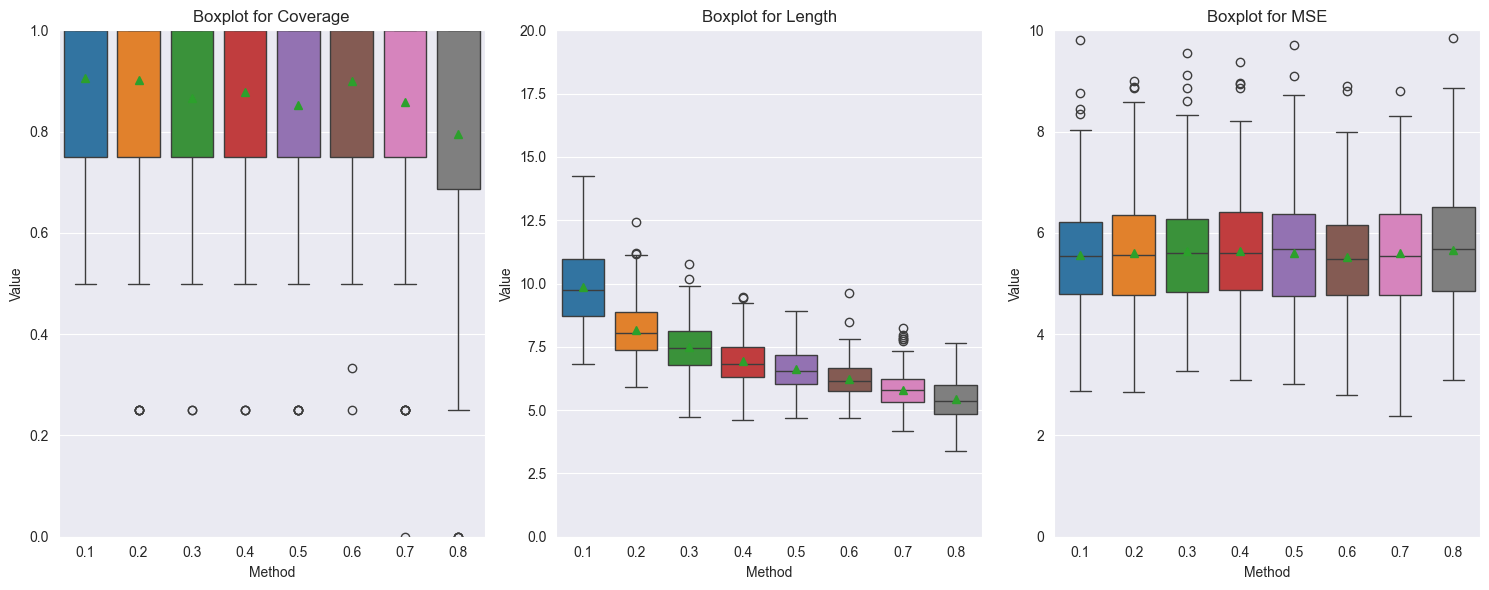

In [379]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])

Coverage :
 5.00     0.883546
10.00    0.875410
20.00    0.813921
0.05     0.647558
0.10     0.468267
0.20     0.422766
dtype: float64
Length :
 5.00     1.747530
10.00    1.741557
20.00    1.741194
0.05     1.689401
0.10     1.598789
0.20     1.482754
dtype: float64
MSE :
 5.00     5.306567
10.00    5.354769
20.00    5.337974
0.05     5.398139
0.10     5.367357
0.20     5.329066
dtype: float64


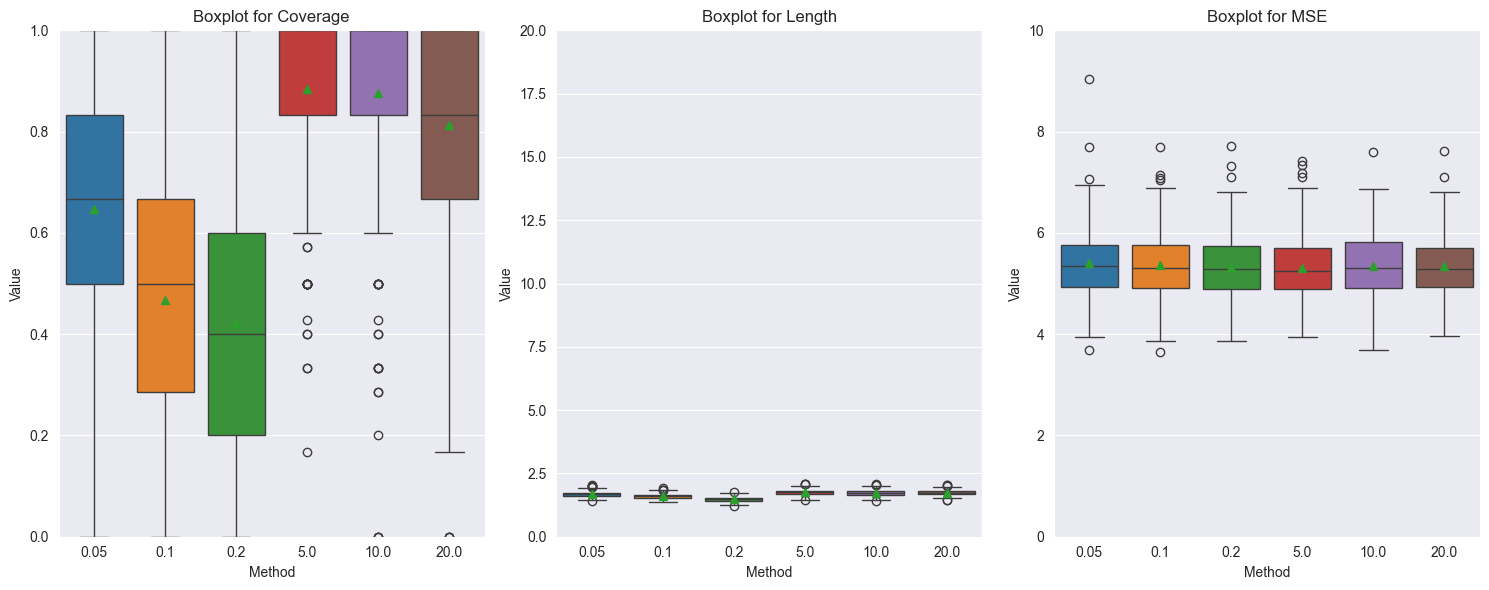

In [178]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])

In [155]:
coverage_df

,5.00,10.00,20.00,0.05,0.10,0.20
0,0.714286,1.000000,1.000000,1.000000,1.000000,0.833333
1,0.833333,0.833333,0.833333,1.000000,1.000000,0.500000
2,0.500000,0.833333,1.000000,0.333333,0.833333,0.833333
3,0.833333,1.000000,0.857143,0.500000,0.833333,1.000000
4,0.600000,1.000000,0.800000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
4,1.000000,1.000000,1.000000,1.000000,0.833333,0.833333
5,0.833333,1.000000,1.000000,0.857143,0.600000,0.833333
6,1.000000,1.000000,1.000000,0.800000,0.833333,1.000000
7,1.000000,1.000000,1.000000,0.166667,1.000000,0.800000
